<a href="https://colab.research.google.com/github/RaneemQaddoura/NPIR/blob/master/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Nearest Point with Indexing Ratio (NPIR)</h1>
An efficient clustering algorithm based on the k-nearest neighbors with an indexing ratio

Nearest Point with Indexing Ratio (NPIR) is a clustering algorithm which explores the characteristics of the data points to group similar data points into the same clusters and dissimilar data points into different clusters. It is based on the nearest neighbor search technique in finding a k-nearest neighbor to a certain point. The algorithm iterates to assign data points to the most suitable clusters. It performs Election, Selection, and Assignment operations to assign data points to appropriate clusters.

<h2>Installation</h2>

Python 3.xx is required

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/NPIR.git

In [ ]:
!git clone https://github.com/RaneemQaddoura/NPIR.git

In [2]:
# Change working directory
import os
os.chdir("NPIR/")

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, treelib, and matplotlib
!pip install -r requirements.txt

In [4]:
#import some packages
from sklearn import metrics
from NPIR import NPIR
import numpy as np
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
datasets_directory = "datasets/"
# Select data sets
#"aggregation","aniso","appendicitis","blobs","circles","diagnosis_II","flame","glass","iris","iris2D","jain","liver","moons","mouse","pathbased","seeds","smiley","varied","vary-density","wdbc","wine"
filename = "vary-density"
#IR: The indexing ratio to be used for generating the maximum index
IR = 0.15
#The number of iteration i
i = 50

In [6]:
#Get current time (start time)
tStart = datetime.datetime.now()

In [7]:
#data manipulation
data = np.genfromtxt(datasets_directory + filename + '.csv', delimiter=',')
points = data[:,:-1] #list of points
k = len(np.unique(data[:,-1]))#k: Number of clusters
labelsTrue = data[:,-1] #List of true class of each points (last field)

In [8]:
#running NPIR
labelsPred = NPIR(points,k,IR,i)

In [ ]:
#printing results
tEnd = datetime.datetime.now()
print('Time: ' + str(tEnd - tStart))
print('labels:')
print(labelsPred)
print('Measures:')
print('HS: ' + str(metrics.homogeneity_score(labelsTrue,labelsPred)))
print('CS: ' + str(metrics.completeness_score(labelsTrue,labelsPred)))
print('VM: ' + str(metrics.v_measure_score(labelsTrue,labelsPred)))
print('AMI: ' + str(metrics.adjusted_mutual_info_score(labelsTrue,labelsPred)))
print('ARI: ' + str(metrics.adjusted_rand_score(labelsTrue,labelsPred)))

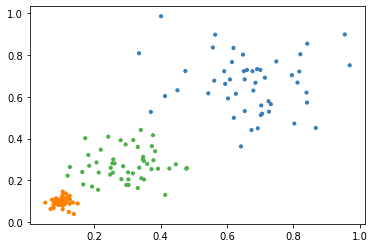

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
from itertools import cycle, islice 
data = np.genfromtxt(datasets_directory + filename + '.csv', delimiter=",")
fig = plt.figure()      
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),int(k))))
plt.scatter(data[:, 0], data[:, 1], s=10, color=colors[labelsPred.tolist()])      
plt.show()
plt.clf()